In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.nunique()

,0
car_ID,205
symboling,6
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
wheelbase,53


In [ ]:
df = df.drop(columns = ['car_ID'])

df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<Axes: >

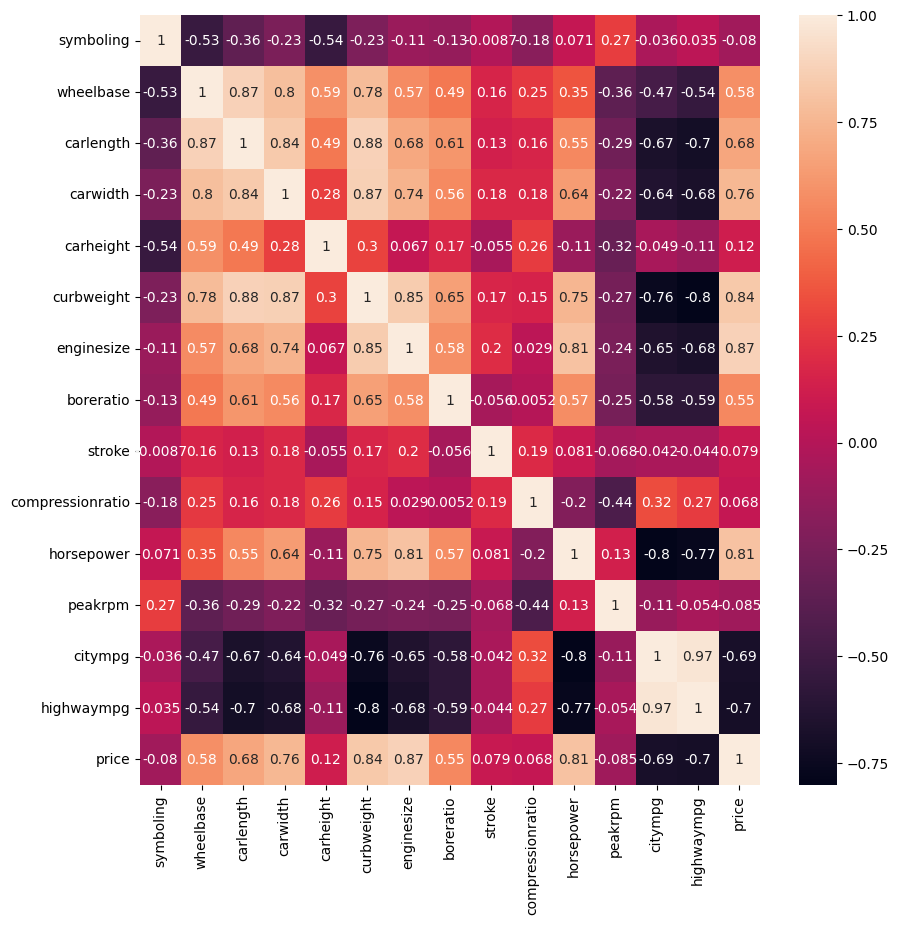

In [ ]:
num_col = [col for col in df.columns if df[col].dtype != 'object']


fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[num_col].corr(),annot = True)

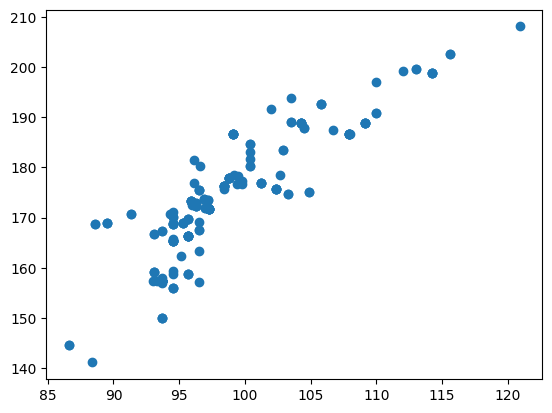

In [ ]:
plt.scatter(df['wheelbase'],df['carlength'])

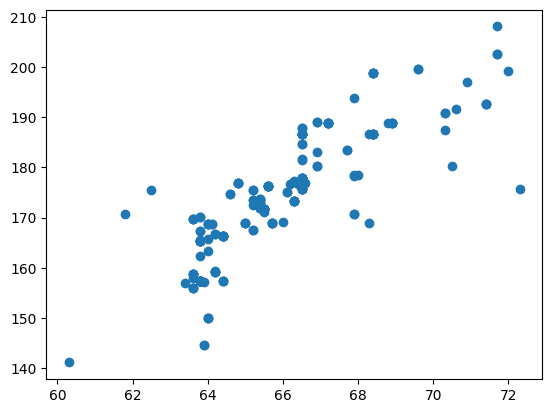

In [ ]:
plt.scatter(df['carwidth'],df['carlength'])

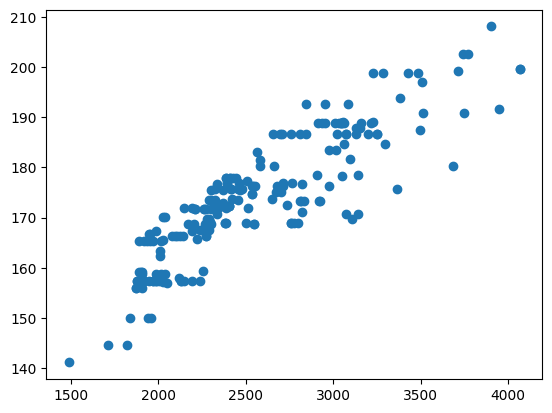

In [ ]:
plt.scatter(df['curbweight'],df['carlength'])

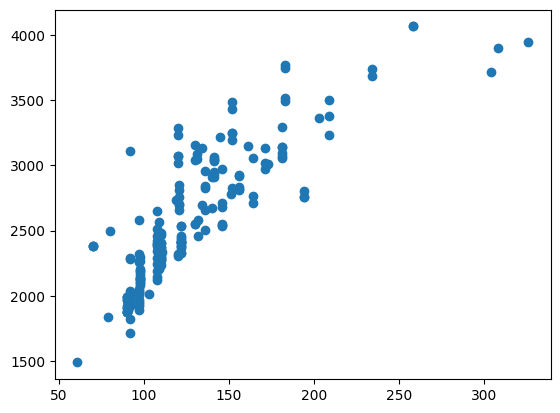

In [ ]:
plt.scatter(df['enginesize'],df['curbweight'])

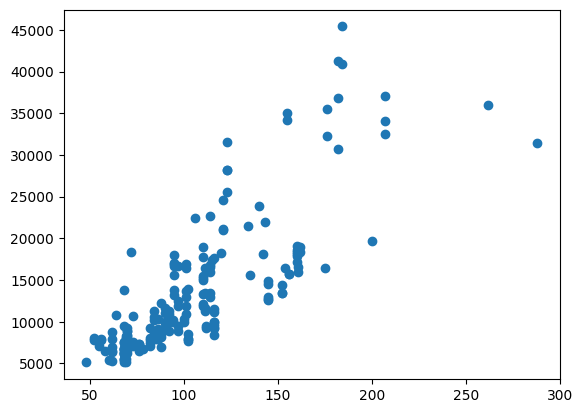

In [ ]:
plt.scatter(df['horsepower'],df['price'])

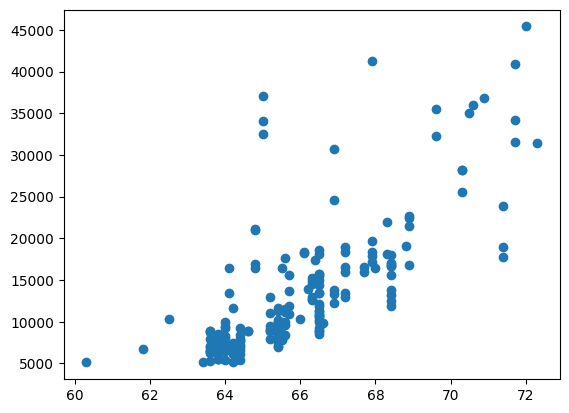

In [ ]:
plt.scatter(df['carwidth'],df['price'])

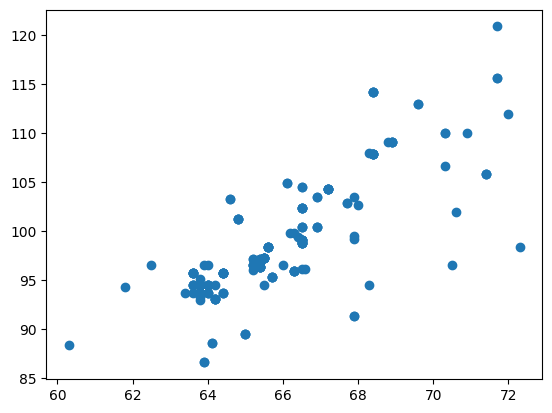

In [ ]:
plt.scatter(df['carwidth'],df['wheelbase'])

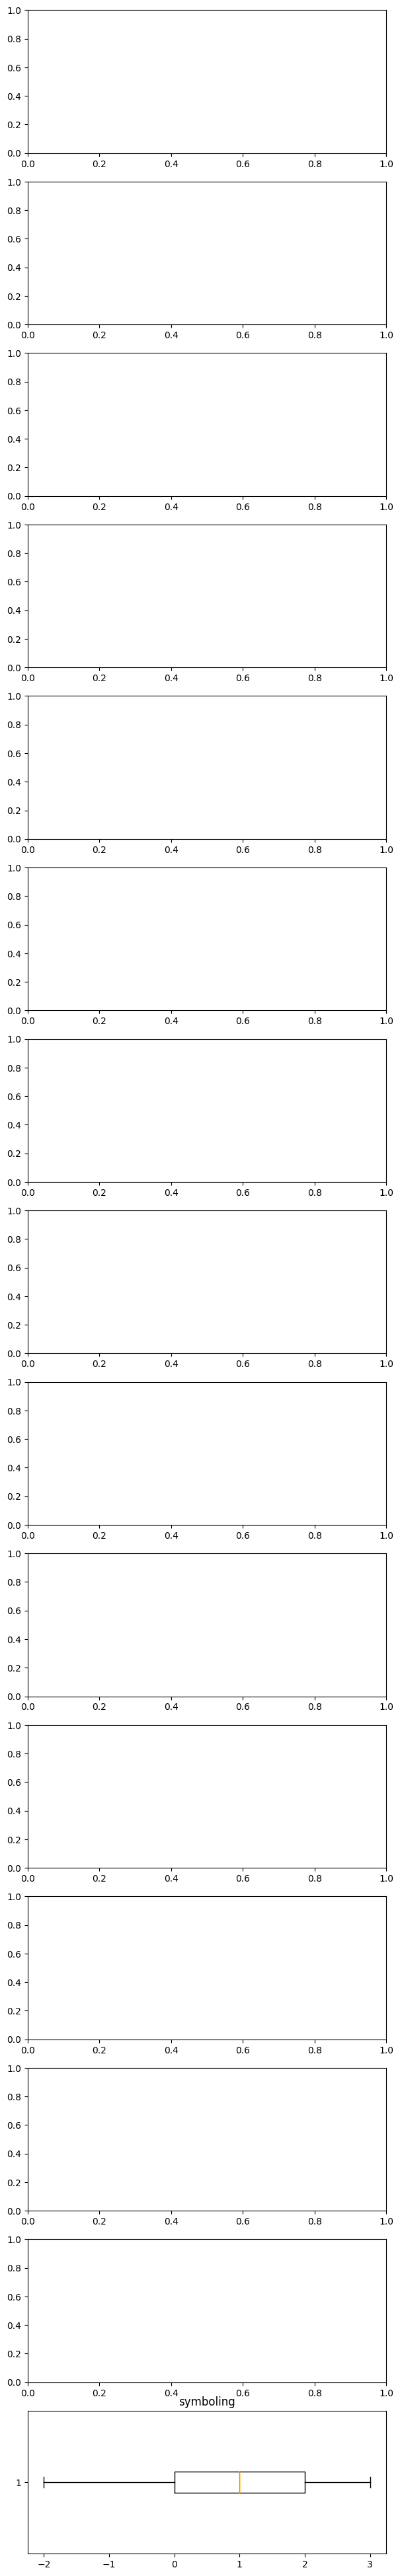

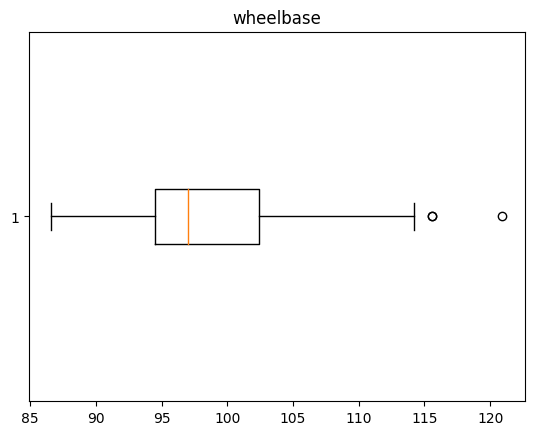

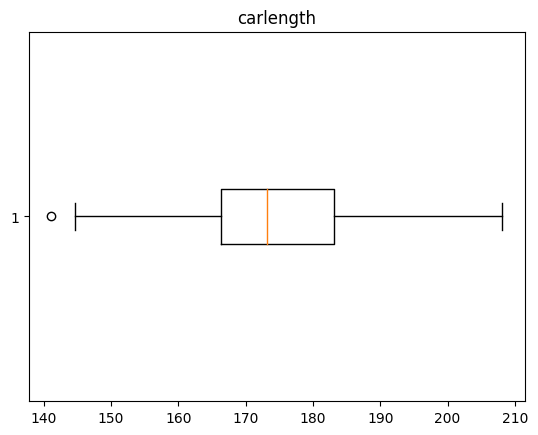

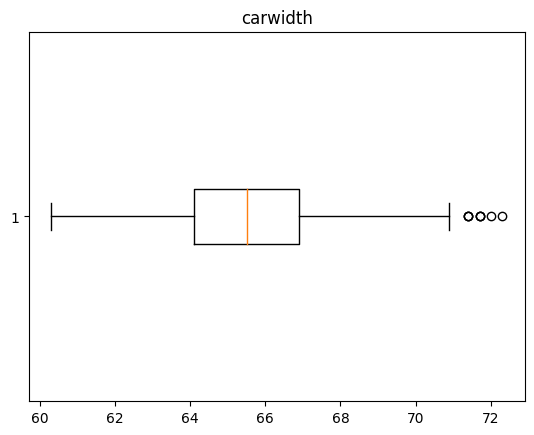

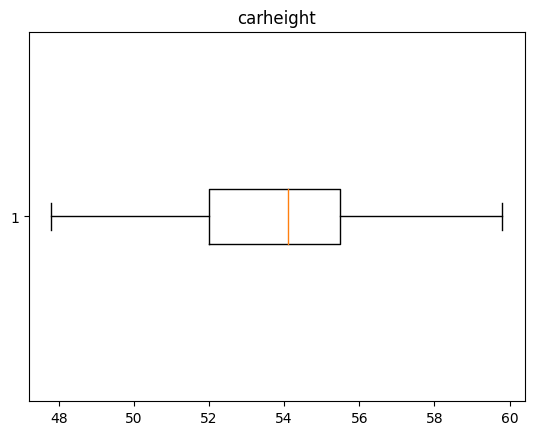

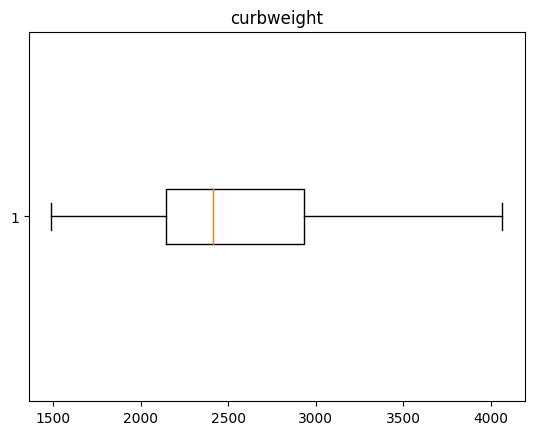

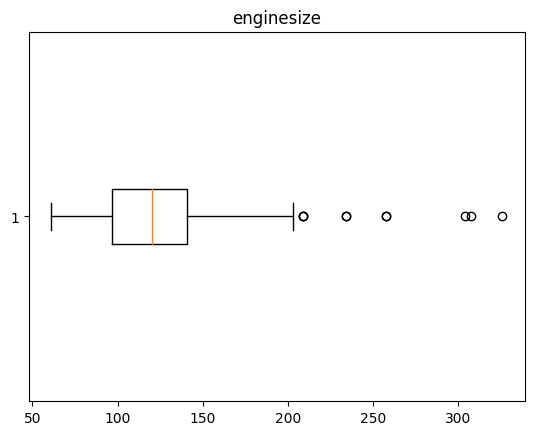

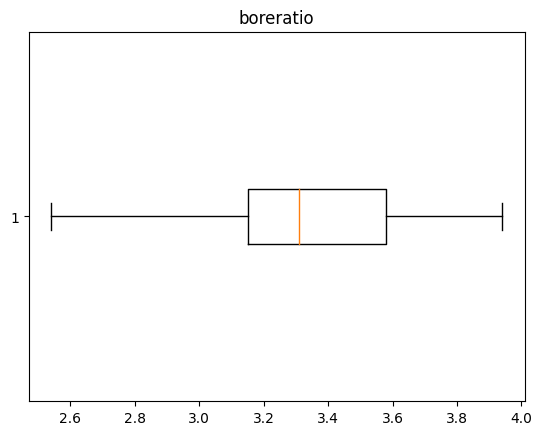

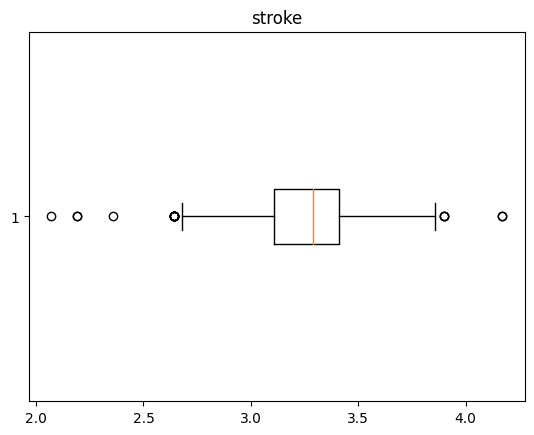

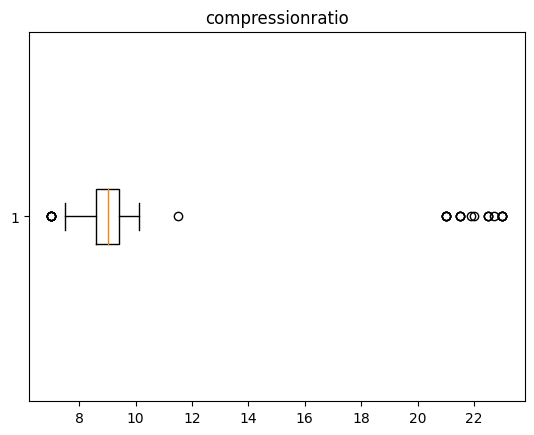

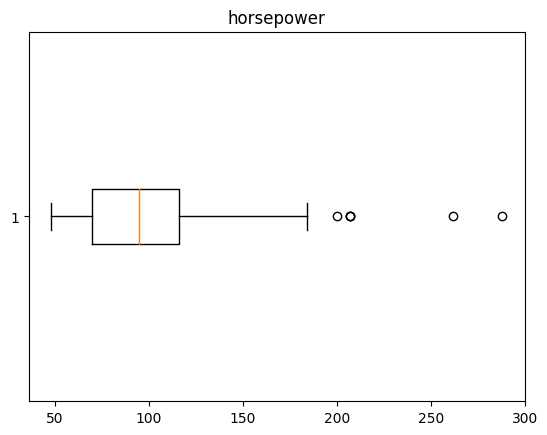

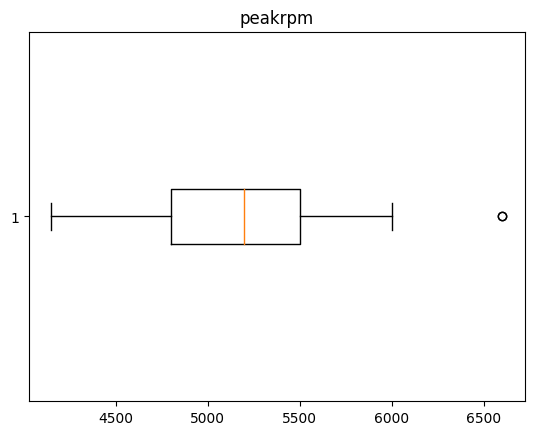

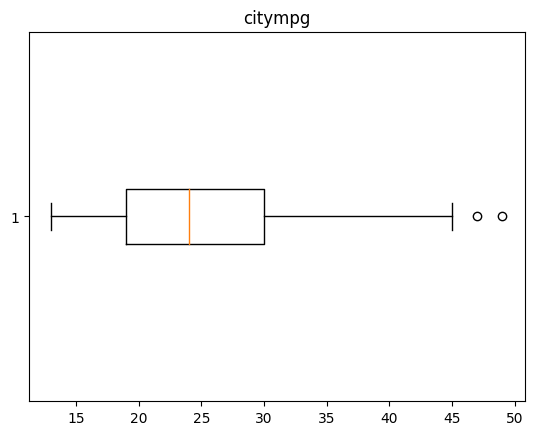

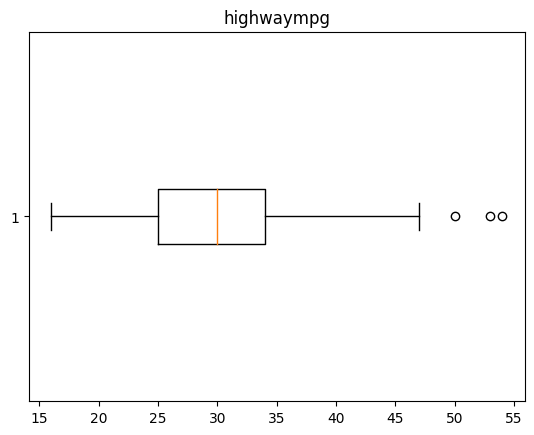

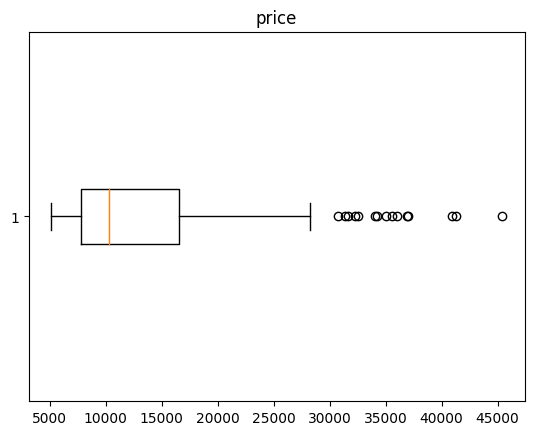

In [ ]:
fig,axs = plt.subplots(len(num_col),1,figsize = (7,50))

for i,j in zip(num_col,range(len(num_col))):
  plt.title(i)
  axs[j] = plt.boxplot(df[i],vert = False)
  plt.show()

In [ ]:
mean = np.mean(df['wheelbase'])
std = np.std(df['wheelbase'])

lower = mean - 2 * std
upper = mean + 2 * std





mean1 = np.mean(df['carwidth'])
std1 = np.std(df['carwidth'])

lower1 = mean1 - 2 * std1
upper1 = mean1 + 2 * std1





mean2 = np.mean(df['enginesize'])
std2 = np.std(df['enginesize'])

lower2 = mean2 - 2 * std2
upper2 = mean2 + 2 * std2





mean3 = np.mean(df['stroke'])
std3 = np.std(df['stroke'])

lower3 = mean3 - 2 * std3
upper3 = mean3 + 2 * std3





mean4 = np.mean(df['compressionratio'])
std4 = np.std(df['compressionratio'])

lower4 = mean4 - 2 * std4
upper4 = mean4 + 2 * std4






mean5 = np.mean(df['horsepower'])
std5 = np.std(df['horsepower'])

lower5 = mean5 - 2 * std5
upper5 = mean5 + 2 * std5





mean6 = np.mean(df['highwaympg'])
std6 = np.std(df['highwaympg'])

lower6 = mean6 - 2 * std6
upper6 = mean6 + 2 * std6

df2 = df[(df['highwaympg'] >= lower6) & (df['highwaympg'] <= upper6)]



mean7 = np.mean(df['price'])
std7 = np.std(df['price'])

lower7 = mean7 - 2 * std7
upper7 = mean7 + 2 * std7

df2 = df[(df['wheelbase'] >= lower) & (df['wheelbase'] <= upper) &
            (df['carwidth'] >= lower1) & (df['carwidth'] <= upper1) &
         (df['enginesize'] >= lower2) & (df['enginesize'] <= upper2) &
        (df['stroke'] >= lower3) & (df['stroke'] <= upper3) &
         (df['compressionratio'] >= lower4) & (df['compressionratio'] <= upper4) &
(df['horsepower'] >= lower5) & (df['horsepower'] <= upper5) &
         (df['highwaympg'] >= lower6) & (df['highwaympg'] <= upper6) &
  (df['price'] >= lower7) & (df['price'] <= upper7)]

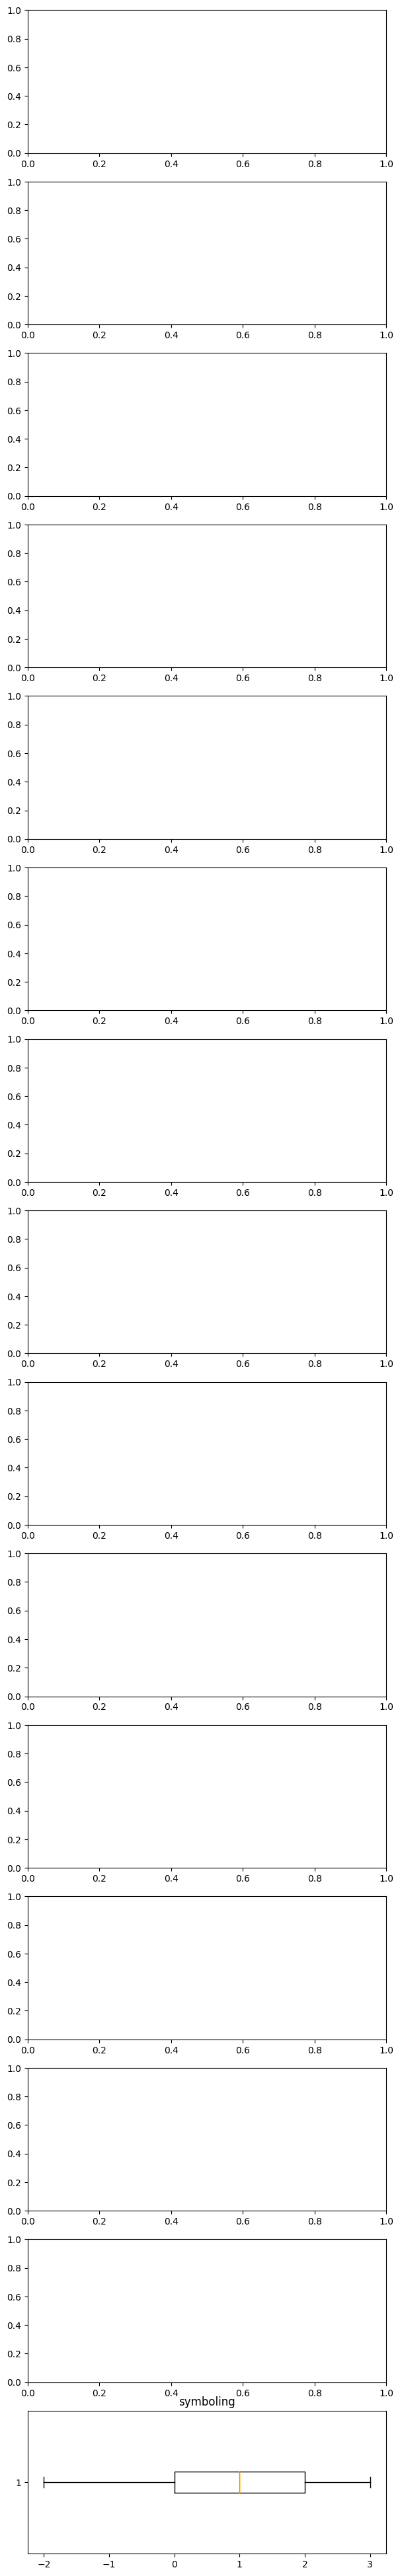

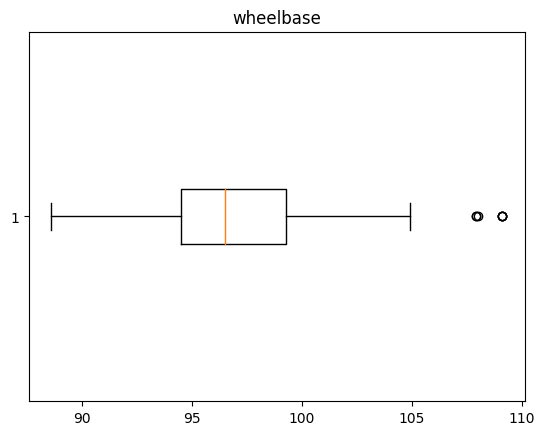

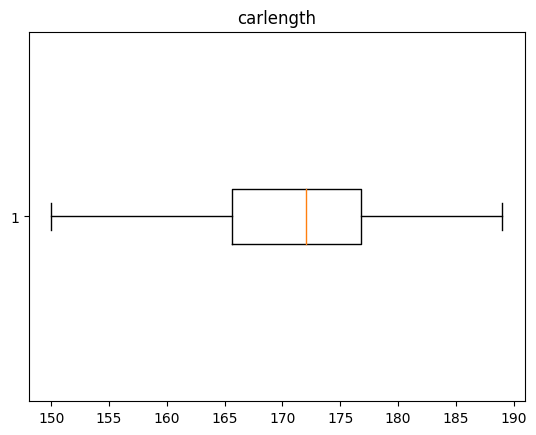

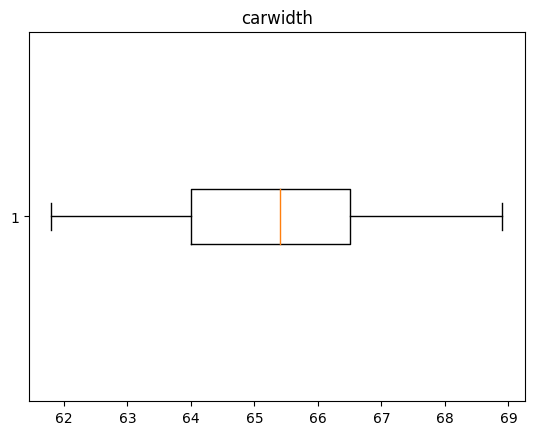

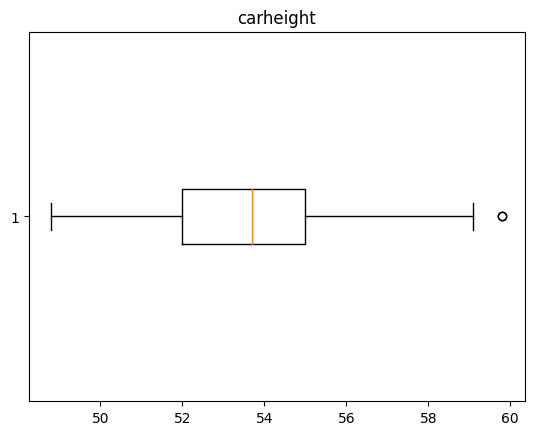

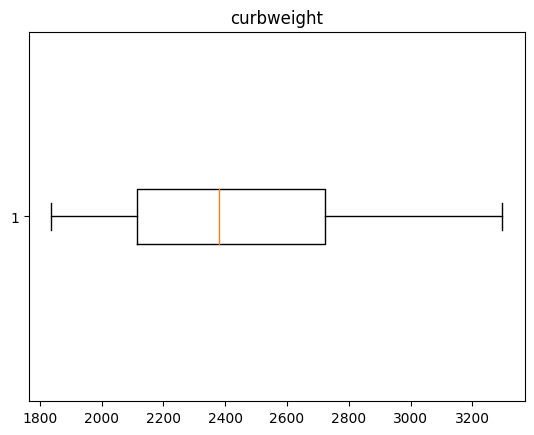

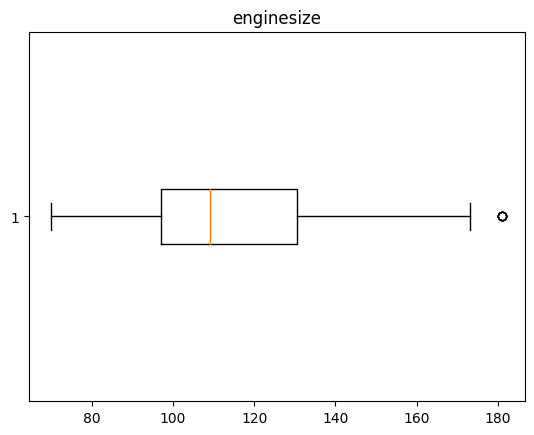

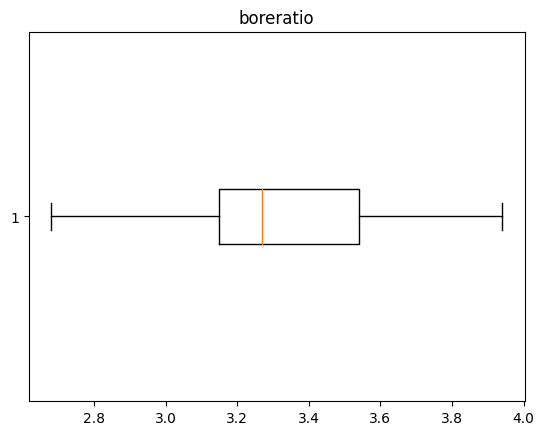

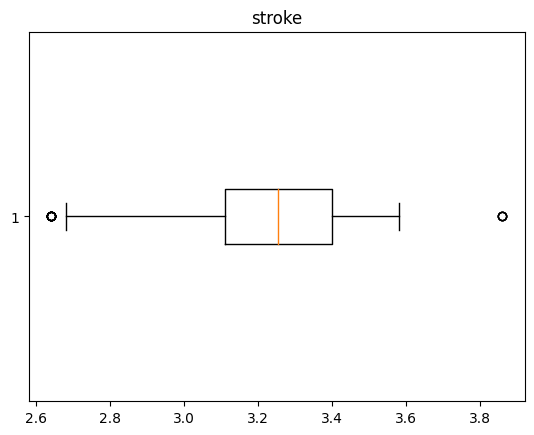

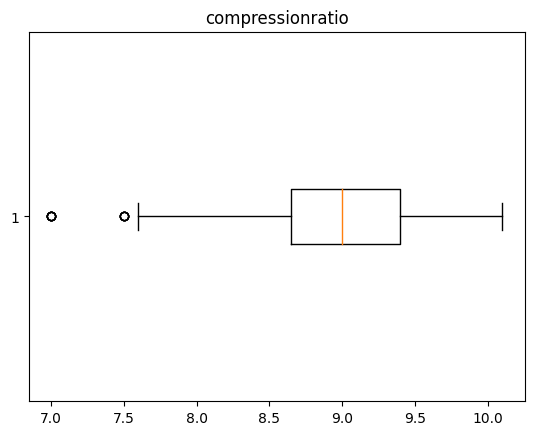

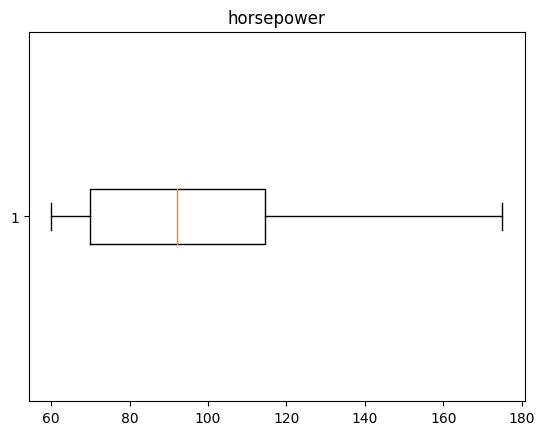

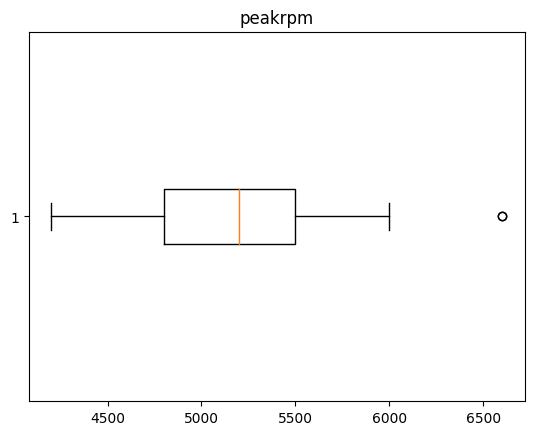

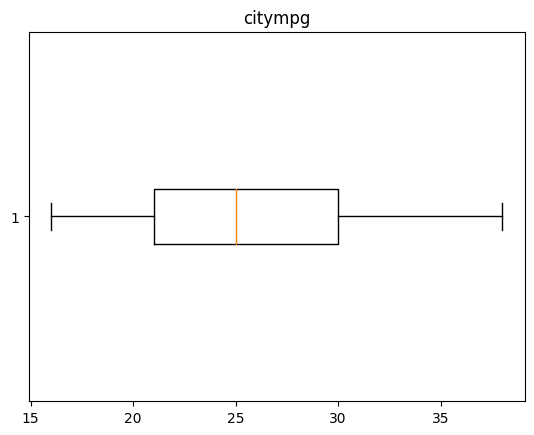

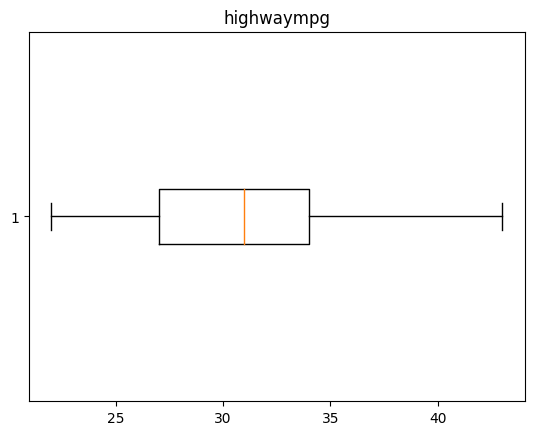

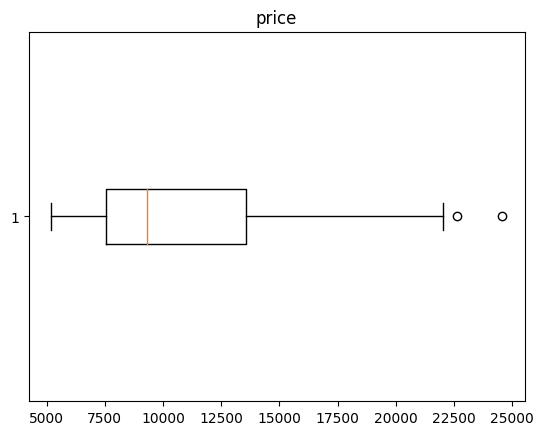

In [ ]:
fig,axs = plt.subplots(len(num_col),1,figsize = (7,50))

for i,j in zip(num_col,range(len(num_col))):
  plt.title(i)
  axs[j] = plt.boxplot(df2[i],vert = False)
  plt.show()

In [ ]:
cat_col = [col for col in df2.columns if df2[col].dtype == 'object']
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_col:
  df2[col] = encoder.fit_transform(df2[col])


df2.head()

<ipython-input-42-e2245d5a19df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = encoder.fit_transform(df2[col])
<ipython-input-42-e2245d5a19df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = encoder.fit_transform(df2[col])
<ipython-input-42-e2245d5a19df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,0,0,1,0,2,0,88.6,168.8,...,130,3,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,0,0,1,0,2,0,88.6,168.8,...,130,3,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,0,1,2,2,0,94.5,171.2,...,152,3,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,0,0,0,3,1,0,99.8,176.6,...,109,3,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,0,0,0,3,0,0,99.4,176.6,...,136,3,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(df2)

scaled_pd = pd.DataFrame(scaled,columns = df2.columns)

scaled_pd.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,0.017699,0.0,0.0,1.0,0.00,1.0,0.0,0.000000,0.482051,...,0.540541,0.6,0.626984,0.032787,0.645161,0.443478,0.333333,0.227273,0.238095,0.428498
1,1.0,0.026549,0.0,0.0,1.0,0.00,1.0,0.0,0.000000,0.482051,...,0.540541,0.6,0.626984,0.032787,0.645161,0.443478,0.333333,0.227273,0.238095,0.583634
2,0.6,0.008850,0.0,0.0,1.0,0.50,1.0,0.0,0.287805,0.543590,...,0.738739,0.6,0.000000,0.680328,0.645161,0.817391,0.333333,0.136364,0.190476,0.583634
3,0.8,0.035398,0.0,0.0,0.0,0.75,0.5,0.0,0.546341,0.682051,...,0.351351,0.6,0.404762,0.622951,0.967742,0.365217,0.541667,0.363636,0.380952,0.451988
4,0.8,0.044248,0.0,0.0,0.0,0.75,0.0,0.0,0.526829,0.682051,...,0.594595,0.6,0.404762,0.622951,0.322581,0.478261,0.541667,0.090909,0.000000,0.632679


In [ ]:
X = scaled_pd.drop(columns = 'price')
y = scaled_pd.price

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

print(X_train.shape)
print(X_test.shape)

(124, 24)
(31, 24)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,activation = 'relu',input_shape = (24,)),
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mean_squared_error',optimizer = 'adam')

model.fit(X_train,y_train,epochs = 50,batch_size = 10,verbose = 0)

test_loss = model.evaluate(X_test,y_test)
print(test_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 0.0167
0.016701193526387215


In [ ]:
model.save('Regression.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('Regression.h5')

loaded_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


array([[0.51606333],
       [0.29360107],
       [0.32758957],
       [0.17558673],
       [0.08609402],
       [0.5088636 ],
       [0.32288978],
       [0.41525957],
       [0.593382  ],
       [0.09984858],
       [0.2843086 ],
       [0.22143884],
       [0.5734422 ],
       [0.21975423],
       [0.13478635],
       [0.10316452],
       [0.16286805],
       [0.30071917],
       [0.08565903],
       [0.24242637],
       [0.10316452],
       [0.10316452],
       [0.3654993 ],
       [0.17090681],
       [0.08498213],
       [0.35206488],
       [0.32722986],
       [0.37744686],
       [0.33395094],
       [0.75941336],
       [0.29573885]], dtype=float32)